In [2]:
from config_figures import *
from sklearn.preprocessing import scale
from statsmodels.multivariate.manova import MANOVA

In [3]:
biome_names = {
    'Boreal Forests/Taiga': 'Boreal Forests',
    'Mediterranean Forests, Woodlands & Scrub': 'Mediterranean Forests',
    'Temperate Broadleaf & Mixed Forests': 'Temperate Broadleaf Forests', 
    'Temperate Conifer Forests': 'Temperate Conifer Forests',
    'Tropical & Subtropical Coniferous Forests': 'Tropical Coniferous Forests',
    'Tropical & Subtropical Dry Broadleaf Forests': 'Tropical Dry Broadleaf Forests',
    'Tropical & Subtropical Moist Broadleaf Forests': 'Tropical Moist Broadleaf Forests'
}

In [4]:
df_list = []
for biome in [3,1,2,6,5,4,12]:
    if biome == 1:
        df = pd.concat([pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '_chunk_' + str(i) + '_outof_5.csv') for i in range(5)])
    else:
        df = pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '.csv' )
        
    df['turnover'] = (1- ((df.n_present - df.n_lost) / (df.n_present + df.n_gained))) * 100 # (1 - Jaccard_index) * 100
    df['frac_gained'] = df['n_gained'] / df['n_present'] * 100
    df['frac_lost'] = df['n_lost'] / df['n_present'] * 100
    df['BIOME_NAME'] = df['BIOME_NAME'].apply(lambda b: biome_names[b])
    df = df.drop(['system:index','BIOME_NUM','REALM','.geo'], axis=1)
    df_list.append(df)

df_ecoregions = pd.concat(df_list)
df_ecoregions = df_ecoregions[df_ecoregions['n_present'] != 0]
df_ecoregions

,BIOME_NAME,ECO_ID,ECO_NAME,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_gained,frac_lost
0,Tropical Coniferous Forests,303,Luzon tropical pine forests,1.480225,2.412819,1.146991,750,9,41,782,0.130527,6.321113,1.150895,5.242967
1,Tropical Coniferous Forests,304,Northeast India-Myanmar pine forests,1.486806,2.471130,1.371576,612,20,120,712,0.172047,19.125683,2.808989,16.853933
2,Tropical Coniferous Forests,305,Sumatran tropical pine forests,1.012247,3.569928,-0.155856,534,40,28,522,0.067577,12.099644,7.662835,5.363985
3,Tropical Coniferous Forests,302,Himalayan subtropical pine forests,1.486365,2.197965,1.369144,650,35,65,680,0.176699,13.986014,5.147059,9.558824
4,Tropical Coniferous Forests,556,Sierra de la Laguna pine-oak forests,0.860494,72.217503,0.605677,451,113,78,416,72.217503,36.105860,27.163462,18.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,Mediterranean Forests,422,California coastal sage and chaparral,0.854646,67.810005,0.601772,627,60,79,646,64.173247,19.688385,9.287926,12.229102
36,Mediterranean Forests,795,Italian sclerophyllous and semi-deciduous forests,4.794860,-59.923142,4.876667,178,1,5,182,0.005799,3.278689,0.549451,2.747253
37,Mediterranean Forests,785,Aegean and Western Turkey sclerophyllous and m...,4.794860,-40.586703,4.686674,199,1,4,202,0.024178,2.463054,0.495050,1.980198
38,Mediterranean Forests,791,Eastern Mediterranean conifer-broadleaf forests,3.249024,-64.713594,3.041497,120,1,80,199,0.037075,40.500000,0.502513,40.201005


In [6]:
df_melted = pd.melt(df_ecoregions, id_vars=['BIOME_NAME','ECO_ID','ECO_NAME'], value_vars=['frac_lost', 'frac_gained', 'abs_latitude_shift', 'elevation_shift']) #'n_present',
df_melted

,BIOME_NAME,ECO_ID,ECO_NAME,variable,value
0,Tropical Coniferous Forests,303,Luzon tropical pine forests,frac_lost,5.242967
1,Tropical Coniferous Forests,304,Northeast India-Myanmar pine forests,frac_lost,16.853933
2,Tropical Coniferous Forests,305,Sumatran tropical pine forests,frac_lost,5.363985
3,Tropical Coniferous Forests,302,Himalayan subtropical pine forests,frac_lost,9.558824
4,Tropical Coniferous Forests,556,Sierra de la Laguna pine-oak forests,frac_lost,18.750000
...,...,...,...,...,...
1967,Mediterranean Forests,422,California coastal sage and chaparral,elevation_shift,67.810005
1968,Mediterranean Forests,795,Italian sclerophyllous and semi-deciduous forests,elevation_shift,-59.923142
1969,Mediterranean Forests,785,Aegean and Western Turkey sclerophyllous and m...,elevation_shift,-40.586703
1970,Mediterranean Forests,791,Eastern Mediterranean conifer-broadleaf forests,elevation_shift,-64.713594


AxesSubplot(0.199125,0.1775;0.184328x0.715833) Fraction lost species (%)
AxesSubplot(0.400141,0.1775;0.184328x0.715833) Fraction gained species (%)
AxesSubplot(0.601156,0.1775;0.184328x0.715833) Absolute latitude shift (°)
AxesSubplot(0.802172,0.1775;0.184328x0.715833) Elevation shift (m)


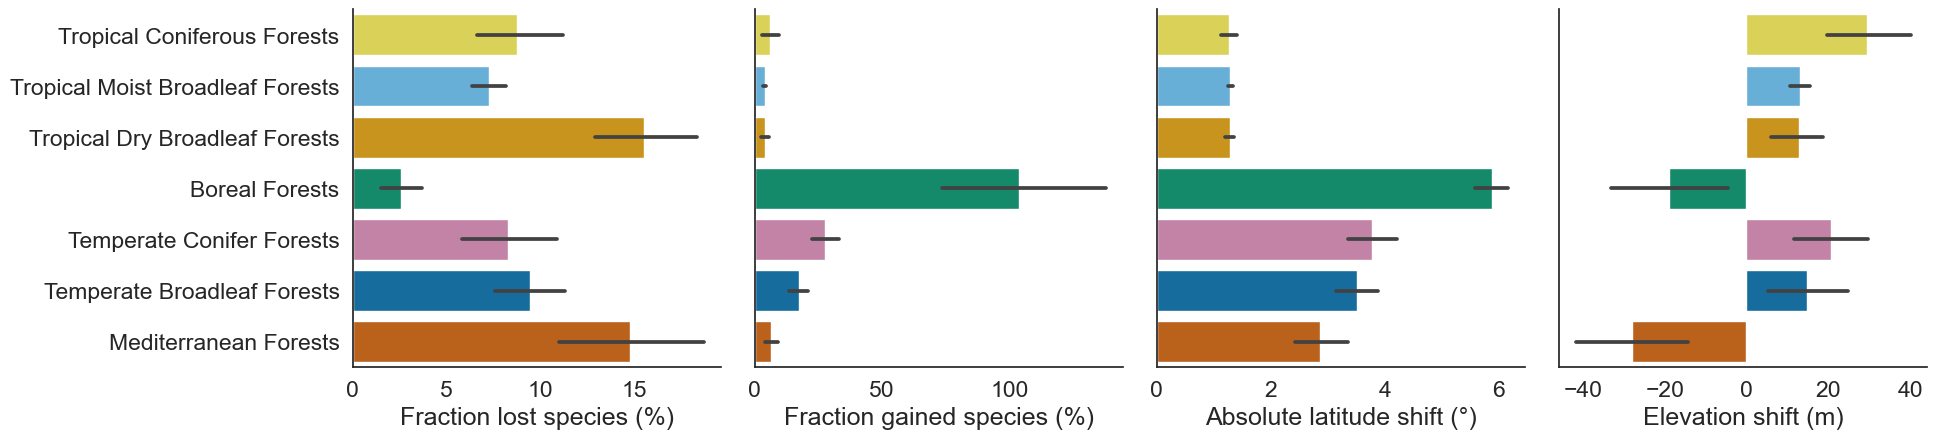

In [18]:
sns.set(style='white', font_scale = 1.5)
g = sns.catplot(data=df_melted, y='BIOME_NAME', x='value', col='variable', kind='bar', estimator='mean', errorbar=('ci', 95),
                sharex=False, col_wrap=4, palette=['#F0E442', '#56B4E9', '#E69F00', '#009E73', '#CC79A7', '#0072B2', '#D55E00'])
g.set_ylabels("")
# g.set_xticklabels(rotation=90)
for ax, lab in zip(g.axes, ['Fraction lost species (%)', 'Fraction gained species (%)', 'Absolute latitude shift (°)', 'Elevation shift (m)']):
    print(ax, lab)
    ax.set_xlabel(lab)
    ax.set_title("")
# plt.tight_layout()
plt.savefig('../figures/climate_change_barplots.png', bbox_inches='tight')

In [190]:
df_ecoregions

,BIOME_NAME,ECO_ID,ECO_NAME,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_gained,frac_lost
0,Tropical Coniferous Forests,303,Luzon tropical pine forests,1.480225,2.412819,1.146991,750,9,41,782,0.130527,6.321113,1.150895,5.242967
1,Tropical Coniferous Forests,304,Northeast India-Myanmar pine forests,1.486806,2.471130,1.371576,612,20,120,712,0.172047,19.125683,2.808989,16.853933
2,Tropical Coniferous Forests,305,Sumatran tropical pine forests,1.012247,3.569928,-0.155856,534,40,28,522,0.067577,12.099644,7.662835,5.363985
3,Tropical Coniferous Forests,302,Himalayan subtropical pine forests,1.486365,2.197965,1.369144,650,35,65,680,0.176699,13.986014,5.147059,9.558824
4,Tropical Coniferous Forests,556,Sierra de la Laguna pine-oak forests,0.860494,72.217503,0.605677,451,113,78,416,72.217503,36.105860,27.163462,18.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,Mediterranean Forests,422,California coastal sage and chaparral,0.854646,67.810005,0.601772,627,60,79,646,64.173247,19.688385,9.287926,12.229102
36,Mediterranean Forests,795,Italian sclerophyllous and semi-deciduous forests,4.794860,-59.923142,4.876667,178,1,5,182,0.005799,3.278689,0.549451,2.747253
37,Mediterranean Forests,785,Aegean and Western Turkey sclerophyllous and m...,4.794860,-40.586703,4.686674,199,1,4,202,0.024178,2.463054,0.495050,1.980198
38,Mediterranean Forests,791,Eastern Mediterranean conifer-broadleaf forests,3.249024,-64.713594,3.041497,120,1,80,199,0.037075,40.500000,0.502513,40.201005


In [205]:
df_ecoregions.std(axis=0) / df_ecoregions.mean(axis=0)

/var/folders/r2/w0bwjv2s0wb_c3q5wpnhbv2h0000gp/T/ipykernel_23585/1851624383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ecoregions.std(axis=0) / df_ecoregions.mean(axis=0)


ECO_ID                 0.516455
abs_latitude_shift     0.734282
elevation_shift        3.555317
latitude_shift         1.849350
n_future               1.030932
n_gained               1.198403
n_lost                 1.369155
n_present              1.040560
pos_elevation_shift    1.255426
turnover               0.800515
frac_gained            2.259953
frac_lost              1.000838
dtype: float64

In [68]:
df_ecoregions['frac_lost'].max()

54.166666666666664

In [16]:
stats = df_ecoregions.groupby('BIOME_NAME')['abs_latitude_shift'].agg(['min','median','max','mean','std','sem'])
stats['C95_low'] = stats['mean'] - 1.96 * stats['sem'] 
stats['C95_high'] = stats['mean'] + 1.96 * stats['sem']
stats

,min,median,max,mean,std,sem,C95_low,C95_high
BIOME_NAME,,,,,,,,
Boreal Forests,3.997930,6.002923,6.749419,5.884980,0.751437,0.147369,5.596137,6.173824
Mediterranean Forests,0.625914,2.701168,5.184848,2.867241,1.566778,0.247729,2.381691,3.352790
Temperate Broadleaf Forests,0.998766,3.632706,5.999715,3.506252,1.746907,0.191748,3.130426,3.882078
Temperate Conifer Forests,1.491479,4.002123,5.999974,3.780102,1.489415,0.217253,3.354285,4.205919
Tropical Coniferous Forests,0.860494,1.127862,1.737324,1.269293,0.288813,0.077189,1.118004,1.420583
Tropical Dry Broadleaf Forests,0.710132,1.254672,2.246967,1.281190,0.325581,0.043901,1.195144,1.367237
Tropical Moist Broadleaf Forests,0.523142,1.268841,3.017594,1.289702,0.310832,0.020585,1.249354,1.330049


In [19]:
stats = df_ecoregions.groupby('BIOME_NAME')['elevation_shift'].agg(['min','median','max','mean','std','sem'])
stats['C95_low'] = stats['mean'] - 1.96 * stats['sem'] 
stats['C95_high'] = stats['mean'] + 1.96 * stats['sem']
stats

,min,median,max,mean,std,sem,C95_low,C95_high
BIOME_NAME,,,,,,,,
Boreal Forests,-95.945779,-1.947184,32.162449,-19.060975,38.929381,7.634680,-34.024947,-4.097003
Mediterranean Forests,-104.127824,-39.976610,69.155453,-28.092990,46.489037,7.350562,-42.500092,-13.685888
Temperate Broadleaf Forests,-70.057990,2.704764,127.946062,14.710375,46.306429,5.082791,4.748104,24.672645
Temperate Conifer Forests,-64.208268,31.409943,95.849295,20.603049,32.121018,4.685332,11.419799,29.786300
Tropical Coniferous Forests,2.197965,34.687451,72.217503,29.567010,21.156794,5.654391,18.484404,40.649616
Tropical Dry Broadleaf Forests,-34.831868,4.447121,64.429237,12.776332,23.749549,3.202389,6.499650,19.053013
Tropical Moist Broadleaf Forests,-33.254541,4.516270,83.527955,13.124941,19.174956,1.269893,10.635952,15.613931


In [165]:
df_ecoregions.groupby('BIOME_NAME')['frac_lost'].agg(['min','median','max','mean','std'])

,min,median,max,mean,std
BIOME_NAME,,,,,
Boreal Forests,0.000000,1.049451,9.090909,2.575907,3.097783
Mediterranean Forests,0.000000,11.704613,54.166667,14.786052,13.118875
Temperate Broadleaf Forests,0.000000,7.309487,39.473684,9.427601,8.843091
Temperate Conifer Forests,0.000000,4.371585,41.666667,8.261612,9.175020
Tropical Coniferous Forests,3.743619,8.000998,18.750000,8.758667,4.838970
Tropical Dry Broadleaf Forests,0.000000,14.180479,46.994536,15.493423,10.366727
Tropical Moist Broadleaf Forests,0.000000,5.080493,45.136778,7.232908,7.080304


In [172]:
df_ecoregions[df_ecoregions['frac_lost'] == 0].groupby('BIOME_NAME').ECO_ID.count()

BIOME_NAME
Boreal Forests                      11
Mediterranean Forests                1
Temperate Broadleaf Forests          7
Temperate Conifer Forests            1
Tropical Dry Broadleaf Forests       3
Tropical Moist Broadleaf Forests     7
Name: ECO_ID, dtype: int64

In [175]:
df_ecoregions[df_ecoregions['frac_lost'] > 30].groupby('BIOME_NAME').ECO_ID.count()

BIOME_NAME
Mediterranean Forests               7
Temperate Broadleaf Forests         4
Temperate Conifer Forests           2
Tropical Dry Broadleaf Forests      5
Tropical Moist Broadleaf Forests    1
Name: ECO_ID, dtype: int64

In [166]:
df_ecoregions.groupby('BIOME_NAME')['frac_gained'].agg(['min','median','max','mean','std'])

,min,median,max,mean,std
BIOME_NAME,,,,,
Boreal Forests,5.555556,76.656437,348.717949,103.688973,85.597903
Mediterranean Forests,0.000000,1.640778,29.118774,6.381047,8.164527
Temperate Broadleaf Forests,0.000000,12.213740,93.700787,17.189668,18.449590
Temperate Conifer Forests,0.609756,27.303754,77.184466,27.764357,19.233212
Tropical Coniferous Forests,0.673905,3.579728,27.163462,5.819566,6.940233
Tropical Dry Broadleaf Forests,0.000000,1.876513,34.146341,3.865146,6.012839
Tropical Moist Broadleaf Forests,0.000000,2.746211,18.869528,3.907748,3.840409


In [196]:
df_ecoregions.groupby('BIOME_NAME')['n_lost'].agg(['min','median','max','mean','std'])

,min,median,max,mean,std
BIOME_NAME,,,,,
Boreal Forests,0,1.0,9,1.769231,2.320477
Mediterranean Forests,0,27.5,84,33.625000,24.893298
Temperate Broadleaf Forests,0,16.0,103,23.783133,24.002057
Temperate Conifer Forests,0,11.0,140,19.297872,25.223277
Tropical Coniferous Forests,28,77.5,214,99.428571,54.272410
Tropical Dry Broadleaf Forests,0,179.0,547,199.727273,147.184497
Tropical Moist Broadleaf Forests,0,44.0,509,85.592105,98.316738


In [199]:
df_ecoregions[df_ecoregions['frac_lost'] > 45]

,BIOME_NAME,ECO_ID,ECO_NAME,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_gained,frac_lost
0,Tropical Moist Broadleaf Forests,257,Northern Khorat Plateau moist deciduous forests,1.477732,0.596298,0.866106,380,19,297,658,0.032843,46.676514,2.887538,45.136778
37,Tropical Dry Broadleaf Forests,292,Chhota-Nagpur dry deciduous forests,1.253030,2.221684,1.131203,316,25,258,549,0.175347,49.303136,4.553734,46.994536
17,Mediterranean Forests,797,Mediterranean dry woodlands and steppe,1.999125,-15.873546,1.876614,55,0,65,120,0.000000,54.166667,0.000000,54.166667


In [201]:
df_ecoregions.groupby('BIOME_NAME')['abs_latitude_shift'].agg(['min','median','max','mean','std'])

,min,median,max,mean,std
BIOME_NAME,,,,,
Boreal Forests,3.997930,6.002923,6.749419,5.884980,0.751437
Mediterranean Forests,0.625914,2.701168,5.184848,2.867241,1.566778
Temperate Broadleaf Forests,0.998766,3.632706,5.999715,3.506252,1.746907
Temperate Conifer Forests,1.491479,4.002123,5.999974,3.780102,1.489415
Tropical Coniferous Forests,0.860494,1.127862,1.737324,1.269293,0.288813
Tropical Dry Broadleaf Forests,0.710132,1.254672,2.246967,1.281190,0.325581
Tropical Moist Broadleaf Forests,0.523142,1.268841,3.017594,1.289702,0.310832


In [204]:
df_ecoregions[df_ecoregions['BIOME_NAME'].str.contains('Tropical')]['abs_latitude_shift'].mean()

1.2871634505241918

In [202]:
df_ecoregions.groupby('BIOME_NAME')['abs_latitude_shift'].agg(['mean','std'])

,mean,std
BIOME_NAME,,
Boreal Forests,5.884980,0.751437
Mediterranean Forests,2.867241,1.566778
Temperate Broadleaf Forests,3.506252,1.746907
Temperate Conifer Forests,3.780102,1.489415
Tropical Coniferous Forests,1.269293,0.288813
Tropical Dry Broadleaf Forests,1.281190,0.325581
Tropical Moist Broadleaf Forests,1.289702,0.310832


In [93]:
df_ecoregions.groupby('BIOME_NAME')['elevation_shift'].agg(['min','median','max','mean','std'])

,min,median,max,mean,std
BIOME_NAME,,,,,
Boreal Forests,-95.945779,-1.947184,32.162449,-19.060975,38.929381
Mediterranean Forests,-104.127824,-39.976610,69.155453,-28.092990,46.489037
Temperate Broadleaf Forests,-70.057990,2.704764,127.946062,14.710375,46.306429
Temperate Conifer Forests,-64.208268,31.409943,95.849295,20.603049,32.121018
Tropical Coniferous Forests,2.197965,34.687451,72.217503,29.567010,21.156794
Tropical Dry Broadleaf Forests,-34.831868,4.447121,64.429237,12.776332,23.749549
Tropical Moist Broadleaf Forests,-33.254541,4.516270,83.527955,13.124941,19.174956


In [152]:
df_ecoregions[df_ecoregions['elevation_shift'] > 50].groupby('BIOME_NAME').ECO_ID.count()

BIOME_NAME
Mediterranean Forests                4
Temperate Broadleaf Forests         11
Temperate Conifer Forests            4
Tropical Coniferous Forests          2
Tropical Dry Broadleaf Forests       2
Tropical Moist Broadleaf Forests     2
Name: ECO_ID, dtype: int64

In [207]:
df_ecoregions[abs(df_ecoregions['elevation_shift']) < 5].shape[0] #/ df_ecoregions.shape[0]

159

In [208]:
df_ecoregions.shape[0]

493

In [127]:
df_ecoregions[abs(df_ecoregions['elevation_shift']) < 1].groupby('BIOME_NAME').ECO_ID.count()

BIOME_NAME
Boreal Forests                       6
Temperate Broadleaf Forests          5
Temperate Conifer Forests            6
Tropical Moist Broadleaf Forests    16
Name: ECO_ID, dtype: int64

In [223]:
df_ecoregions[df_ecoregions['elevation_shift'] < -80]#.groupby('BIOME_NAME')#.ECO_ID.count()

,BIOME_NAME,ECO_ID,ECO_NAME,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_gained,frac_lost
9,Boreal Forests,381,Northwest Territories taiga,6.749419,-95.945779,6.749419,65,40,0,25,0.0,61.538462,160.000000,0.000000
12,Boreal Forests,379,Northern Canadian Shield taiga,6.377339,-95.725048,6.377339,78,54,0,24,0.0,69.230769,225.000000,0.000000
12,Mediterranean Forests,805,Southwest Iberian Mediterranean sclerophyllous...,4.124810,-96.228479,3.561133,98,1,18,115,0.0,16.379310,0.869565,15.652174
16,Mediterranean Forests,803,Southeast Iberian shrubs and woodlands,3.000019,-104.127824,3.000019,47,0,29,76,0.0,38.157895,0.000000,38.157895
20,Mediterranean Forests,789,Crete Mediterranean forests,3.999176,-80.135907,3.626911,102,1,24,125,0.0,19.841270,0.800000,19.200000
31,Mediterranean Forests,794,Illyrian deciduous forests,4.496038,-80.785094,4.496038,131,6,49,174,0.0,30.555556,3.448276,28.160920


In [222]:
df_ecoregions[df_ecoregions['elevation_shift'] > 60]#.groupby('BIOME_NAME')#.ECO_ID.count()

,BIOME_NAME,ECO_ID,ECO_NAME,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_gained,frac_lost
4,Tropical Coniferous Forests,556,Sierra de la Laguna pine-oak forests,0.860494,72.217503,0.605677,451,113,78,416,72.217503,36.105860,27.163462,18.750000
32,Tropical Moist Broadleaf Forests,624,Kermadec Islands subtropical moist forests,1.509338,83.527955,-1.430438,113,5,8,116,84.012376,10.743802,4.310345,6.896552
36,Tropical Moist Broadleaf Forests,147,Norfolk Island subtropical forests,1.749112,64.437897,-1.183022,206,17,3,192,64.307276,9.569378,8.854167,1.562500
20,Tropical Dry Broadleaf Forests,544,Sierra de la Laguna dry forests,0.851804,64.429237,0.600567,479,80,95,494,64.429237,30.487805,16.194332,19.230769
2,Temperate Conifer Forests,696,Helanshan montane conifer forests,2.804896,95.849295,2.804896,122,39,4,87,95.849295,34.126984,44.827586,4.597701
8,Temperate Conifer Forests,709,Tian Shan montane conifer forests,2.999377,63.826462,2.999377,157,26,3,134,63.826462,18.125000,19.402985,2.238806
28,Temperate Conifer Forests,368,Wasatch and Uinta montane forests,3.874463,63.913781,3.874463,360,159,5,206,63.913781,44.931507,77.184466,2.427184
11,Temperate Broadleaf Forests,169,Fiordland temperate forests,1.254049,103.978487,-1.246738,127,30,2,99,103.978487,24.806202,30.303030,2.020202
12,Temperate Broadleaf Forests,180,Westland temperate forests,1.361658,93.221839,-1.252191,128,18,1,111,92.674528,14.728682,16.216216,0.900901
13,Temperate Broadleaf Forests,170,Nelson Coast temperate forests,1.387608,93.221839,-1.387608,130,1,0,129,92.674528,0.769231,0.775194,0.000000


In [35]:
df_ecoregions[df_ecoregions['latitude_shift'] > 6]

,BIOME_NAME,ECO_ID,ECO_NAME,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_gained,frac_lost
0,Boreal Forests,369,Alaska Peninsula montane taiga,6.749419,-40.096978,6.749419,46,3,2,45,0.000000,10.416667,6.666667,4.444444
1,Boreal Forests,373,Eastern Canadian forests,6.140139,32.114500,6.140139,234,104,4,134,32.114500,45.378151,77.611940,2.985075
2,Boreal Forests,374,Eastern Canadian Shield taiga,6.003056,24.389036,6.003056,148,105,0,43,24.389036,70.945946,244.186047,0.000000
3,Boreal Forests,370,Central Canadian Shield forests,6.312332,32.162449,6.312332,210,146,6,70,32.162449,70.370370,208.571429,8.571429
4,Boreal Forests,382,Southern Hudson Bay taiga,6.280544,-3.772873,6.280544,174,136,1,39,0.052868,78.285714,348.717949,2.564103
5,Boreal Forests,372,Copper Plateau taiga,6.249128,-63.770821,6.249128,75,30,0,45,0.000000,40.000000,66.666667,0.000000
6,Boreal Forests,371,Cook Inlet taiga,6.505241,-39.812047,6.505241,57,8,1,50,0.000000,15.517241,16.000000,2.000000
7,Boreal Forests,377,Midwest Canadian Shield forests,6.187831,32.157252,6.187831,203,131,5,77,32.137275,65.384615,170.129870,6.493506
8,Boreal Forests,375,Interior Alaska-Yukon lowland taiga,6.186923,-51.933900,6.186923,70,24,0,46,0.000000,34.285714,52.173913,0.000000
9,Boreal Forests,381,Northwest Territories taiga,6.749419,-95.945779,6.749419,65,40,0,25,0.000000,61.538462,160.000000,0.000000


# Statistical analysis

In [10]:
# normalise such that each column has mean=0 and std=1 for further statistical analyses
df_norm = pd.DataFrame(scale(df_ecoregions[vars]), columns=vars)
df_norm['BIOME_NAME'] = df_ecoregions.loc[:,'BIOME_NAME'].values
df_norm

,n_present,frac_lost,frac_gained,abs_latitude_shift,elevation_shift,BIOME_NAME
0,-0.076496,-0.419624,-0.406343,-0.473954,-0.209978,Tropical Coniferous Forests
1,-0.155096,0.866058,-0.353623,-0.470000,-0.208248,Tropical Coniferous Forests
2,-0.368439,-0.406224,-0.199292,-0.755110,-0.175652,Tropical Coniferous Forests
3,-0.191028,0.058270,-0.279282,-0.470265,-0.216352,Tropical Coniferous Forests
4,-0.487462,1.076009,0.420744,-0.846282,1.860781,Tropical Coniferous Forests
...,...,...,...,...,...,...
492,-0.229205,0.353950,-0.147621,-0.849795,1.730033,Mediterranean Forests
493,-0.750210,-0.695975,-0.425466,1.517447,-2.059178,Mediterranean Forests
494,-0.727753,-0.780911,-0.427196,1.517447,-1.485561,Mediterranean Forests
495,-0.731121,3.451278,-0.426959,0.588724,-2.201287,Mediterranean Forests


In [26]:
df_ecoregions[['abs_latitude_shift', 'elevation_shift', 'frac_lost', 'frac_gained']].corr()

,abs_latitude_shift,elevation_shift,frac_lost,frac_gained
abs_latitude_shift,1.000000,-0.360979,0.026569,0.514873
elevation_shift,-0.360979,1.000000,-0.208692,-0.014384
frac_lost,0.026569,-0.208692,1.000000,-0.115512
frac_gained,0.514873,-0.014384,-0.115512,1.000000


In [24]:
manova_result = MANOVA.from_formula('abs_latitude_shift + elevation_shift + frac_lost + frac_gained ~ BIOME_NAME', df_ecoregions)
print(manova_result.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.2566 4.0000 483.0000 349.7529 0.0000
           Pillai's trace 0.7434 4.0000 483.0000 349.7529 0.0000
   Hotelling-Lawley trace 2.8965 4.0000 483.0000 349.7529 0.0000
      Roy's greatest root 2.8965 4.0000 483.0000 349.7529 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       BIOME_NAME       Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.1608 24.0000 1686.1957  48.3706 0.0000
         Pillai's trace 1.2074 24.0000 1944.0

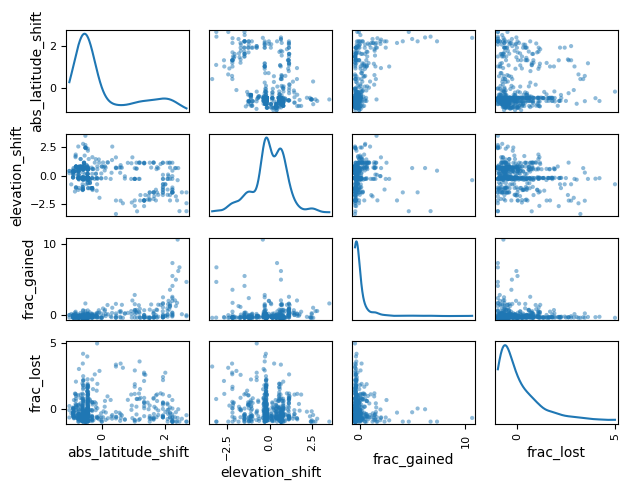

In [13]:
pd.plotting.scatter_matrix(df_norm[['abs_latitude_shift', 'elevation_shift', 'frac_gained', 'frac_lost']], diagonal="kde")
plt.tight_layout()
plt.show()

In [87]:
df_all[['abs_latitude_shift', 'elevation_shift', 'frac_gained', 'frac_lost']].corr()

,abs_latitude_shift,elevation_shift,frac_gained,frac_lost
abs_latitude_shift,1.000000,-0.360979,0.514873,0.026569
elevation_shift,-0.360979,1.000000,-0.014384,-0.208692
frac_gained,0.514873,-0.014384,1.000000,-0.115512
frac_lost,0.026569,-0.208692,-0.115512,1.000000


In [63]:
df_all[['BIOME_NAME', 'abs_latitude_shift', 'elevation_shift', 'frac_gained', 'frac_lost']]

,BIOME_NAME,abs_latitude_shift,elevation_shift,frac_gained,frac_lost
0,Tropical Coniferous Forests,1.480225,2.412819,1.150895,5.242967
1,Tropical Coniferous Forests,1.486806,2.471130,2.808989,16.853933
2,Tropical Coniferous Forests,1.012247,3.569928,7.662835,5.363985
3,Tropical Coniferous Forests,1.486365,2.197965,5.147059,9.558824
4,Tropical Coniferous Forests,0.860494,72.217503,27.163462,18.750000
...,...,...,...,...,...
35,Mediterranean Forests,0.854646,67.810005,9.287926,12.229102
36,Mediterranean Forests,4.794860,-59.923142,0.549451,2.747253
37,Mediterranean Forests,4.794860,-40.586703,0.495050,1.980198
38,Mediterranean Forests,3.249024,-64.713594,0.502513,40.201005


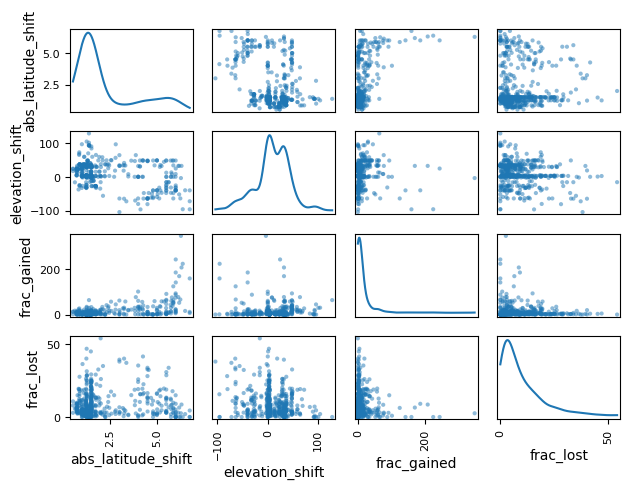

In [65]:
pd.plotting.scatter_matrix(df_all[['abs_latitude_shift', 'elevation_shift', 'frac_gained', 'frac_lost']], diagonal="kde")
plt.tight_layout()
plt.show()


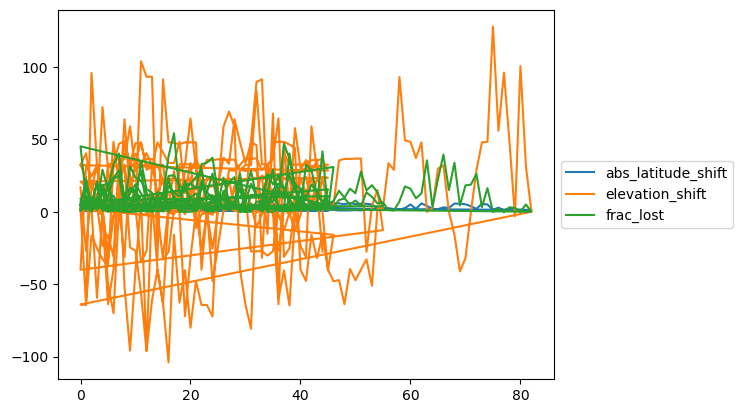

In [70]:
ax = df_all[['abs_latitude_shift', 'elevation_shift', 'frac_lost']].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [61]:
manova_result = MANOVA.from_formula('abs_latitude_shift + elevation_shift ~ BIOME_NAME', df_all)
print(manova_result.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.3260 2.0000 485.0000 501.2614 0.0000
          Pillai's trace 0.6740 2.0000 485.0000 501.2614 0.0000
  Hotelling-Lawley trace 2.0671 2.0000 485.0000 501.2614 0.0000
     Roy's greatest root 2.0671 2.0000 485.0000 501.2614 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       BIOME_NAME       Value   Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.2805 12.0000 970.0000  71.7837 0.0000
         Pillai's trace 0.8257 12.0000 972.0000  56.9516 0.

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='abs_latitude_shift', ylabel='BIOME_NAME'>

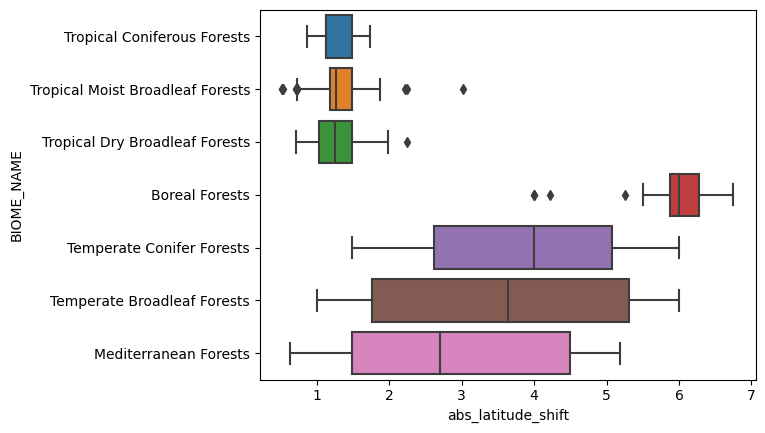

In [44]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='abs_latitude_shift')

<AxesSubplot:xlabel='elevation_shift', ylabel='BIOME_NAME'>

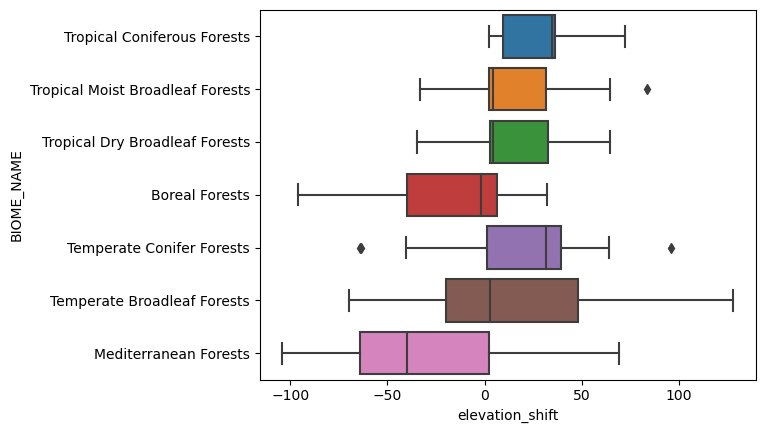

In [45]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='elevation_shift')

<AxesSubplot:xlabel='n_present', ylabel='BIOME_NAME'>

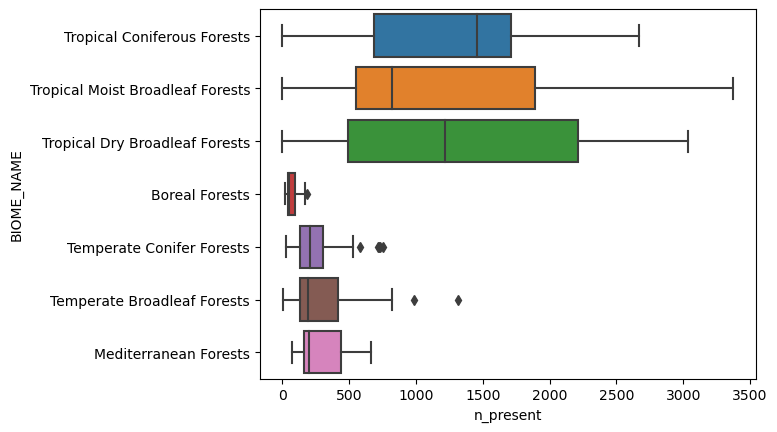

In [46]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='n_present')

<AxesSubplot:xlabel='frac_gained', ylabel='BIOME_NAME'>

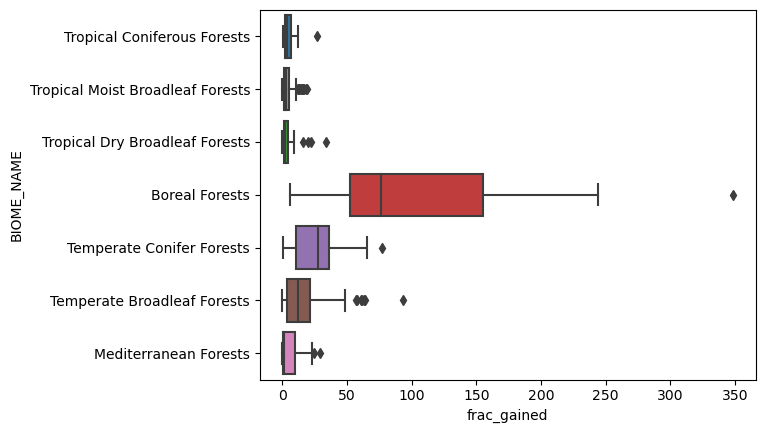

In [47]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='frac_gained')

<AxesSubplot:xlabel='frac_lost', ylabel='BIOME_NAME'>

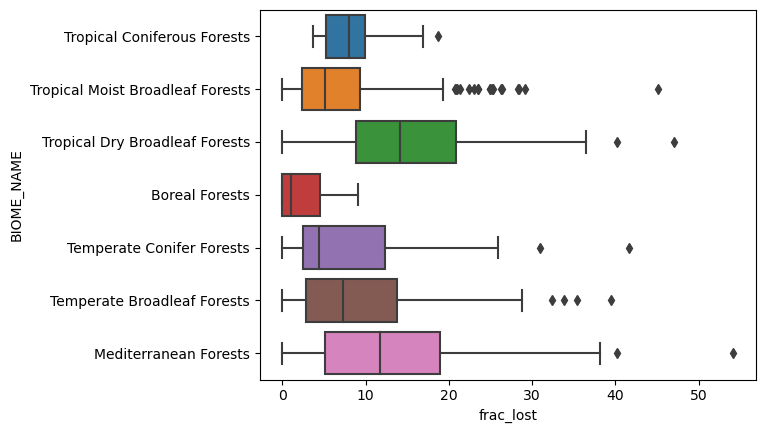

In [48]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='frac_lost')

In [11]:
df_biome.iloc[0]['BIOME_NAME']

NameError: name 'df_biome' is not defined

15 0.13333333333333333
230 0.008695652173913044
56 0.03571428571428571
26 0.07692307692307693
47 0.0425531914893617
83 0.024096385542168676
40 0.05


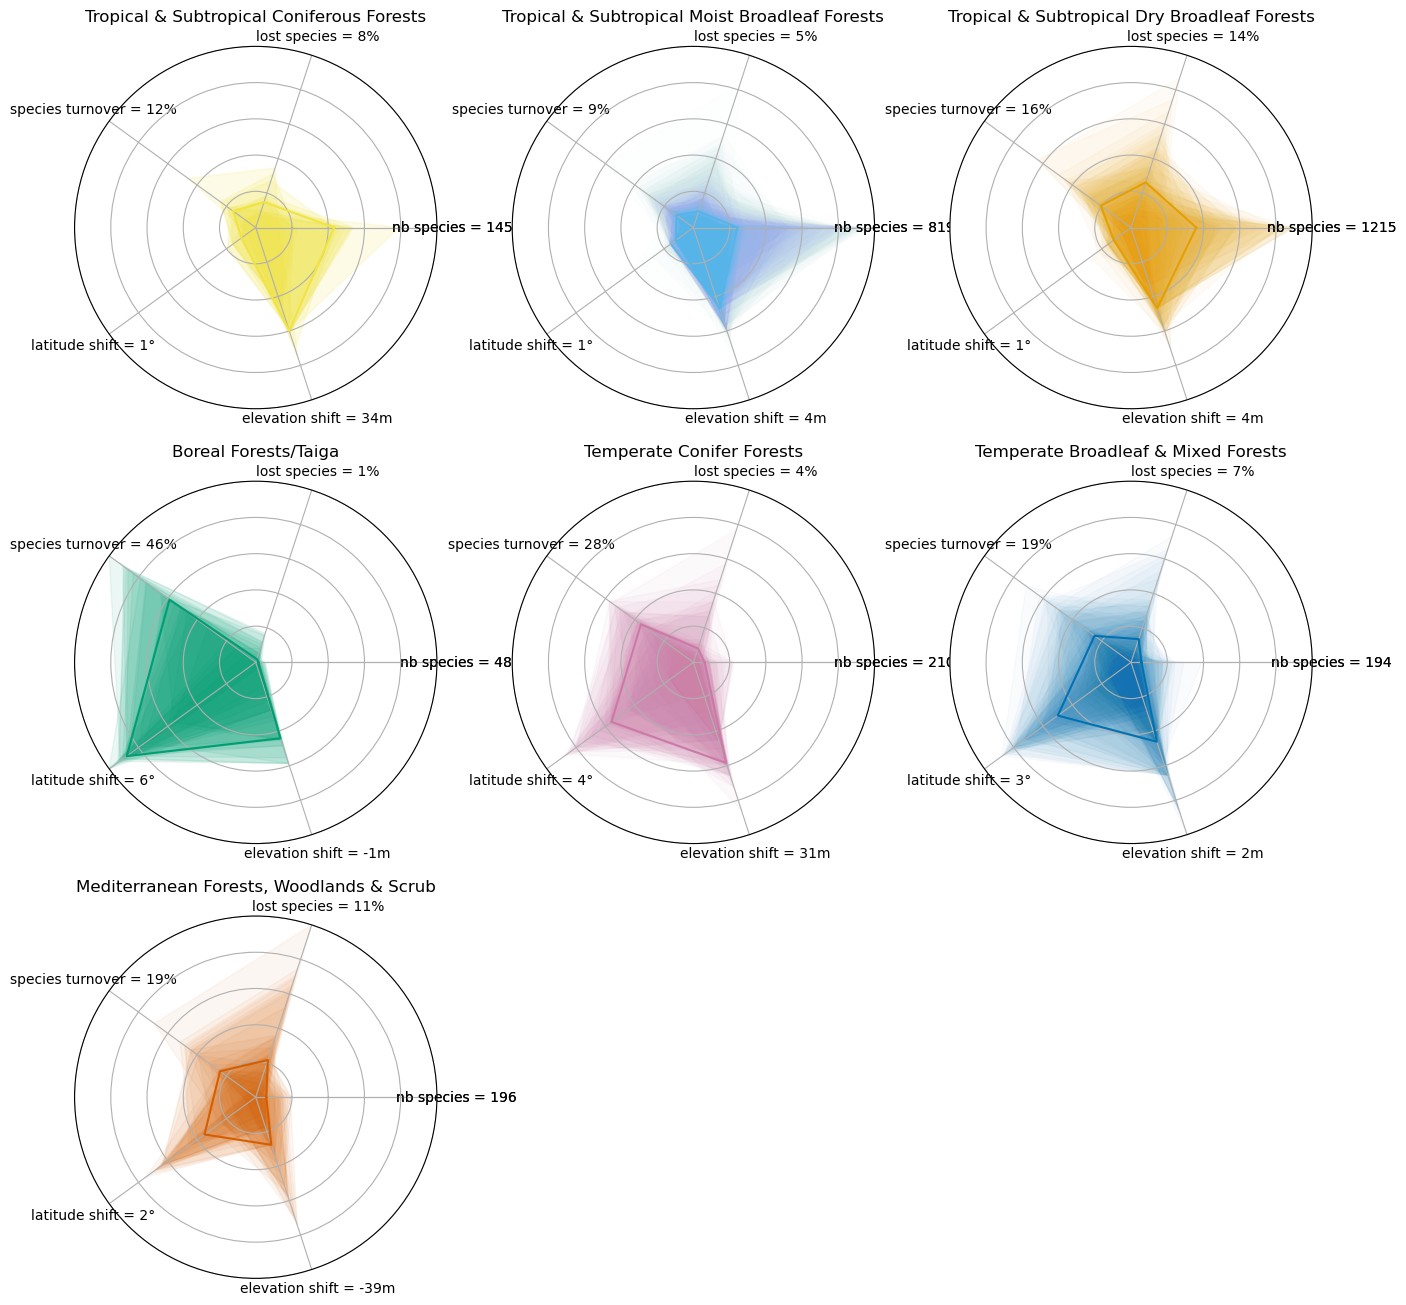

In [12]:
biomes = df_eco['BIOME_NUM'].unique().tolist()
colors = ['#F0E442', '#56B4E9', '#E69F00', '#009E73', '#CC79A7', '#0072B2', '#D55E00']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16,16), subplot_kw=dict(projection='polar'))

for ax, biome, color in zip(axs.flat[0:len(biomes)], biomes, colors):
    df_biome = df_eco[df_eco['BIOME_NUM']==biome]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cats)+1)
    n_eco = df_biome.shape[0]
    print(n_eco, 2/n_eco)

    for l in df_biome.iterrows():
        vals = list(l[1][cats])
        vals = [*vals, vals[0]]
        ax.fill(label_loc, vals, alpha=2/n_eco, label='_nolegend_', color=color)

    biome_median_norm = df_biome[cats].median()
    biome_median_vals = [*biome_median_norm, biome_median_norm[0]]
    ax.plot(label_loc, biome_median_vals, label=df_line[0], color=color) 

    cat_labels = [f"{cn} = {int(df_biome[c].median())}{cu}" for c, cn, cu in  zip(categories, cat_names, cat_units)]
    cat_labels = [*cat_labels, cat_labels[0]]
    ax.set_thetagrids(np.degrees(label_loc), labels=cat_labels)

    ax.set_title(df_biome.iloc[0]['BIOME_NAME'])
    ax.set_ylim(0,1)
    ax.yaxis.set_ticklabels([])

for ax in axs.flat:
    if not bool(ax.has_data()): fig.delaxes(ax) # delete if nothing is plotted in the axes obj

plt.show()
